# Mesh Construction from Disjoint Meshes

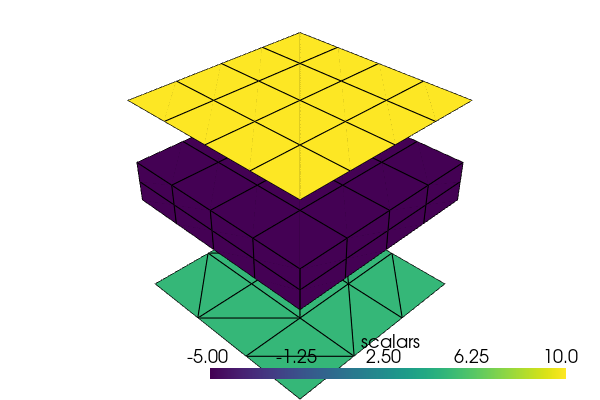

In [2]:
from polymesh import PolyData
from polymesh.trimesh import TriMesh
from polymesh.grid import Grid
from polymesh.space import StandardFrame
import numpy as np

A = StandardFrame(dim=3)
tri = TriMesh(size=(100, 100), shape=(4, 4), frame=A)
grid2d = Grid(size=(100, 100), shape=(4, 4), eshape='Q4', frame=A)
grid3d = Grid(size=(100, 100, 20), shape=(4, 4, 2), eshape='H8', frame=A)

mesh = PolyData(frame=A)
mesh['tri', 'T3'] = tri.move(np.array([0., 0., -50]))
mesh['grids', 'Q4'] = grid2d.move(np.array([0., 0., 50]))
mesh['grids', 'H8'] = grid3d

mesh['tri', 'T3'].pointdata['values'] = np.full(tri.coords().shape[0], 5.)
mesh['grids', 'Q4'].pointdata['values'] = np.full(
    grid2d.coords().shape[0], 10.)
mesh['grids', 'H8'].pointdata['values'] = np.full(
    grid3d.coords().shape[0], -5.)

# finalize the mesh and lock the layout
mesh.to_standard_form()
mesh.lock(create_mappers=True)

mesh.pvplot(notebook=True, window_size = (600, 400), 
            jupyter_backend='static', scalars=mesh.pd['values'].to_numpy())
